In [1]:
# Essential imports

import numpy as np
import pandas as pd 
import re


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
import matplotlib.pyplot as plt

/kaggle/input/flipkart-customer-review-and-rating/data.csv


In [2]:
dataFrame = pd.read_csv('/kaggle/input/flipkart-customer-review-and-rating/data.csv')
##showing first 5 reviews
dataFrame[0:5]

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,Awsome sound powerful bass battery backup is a...,5


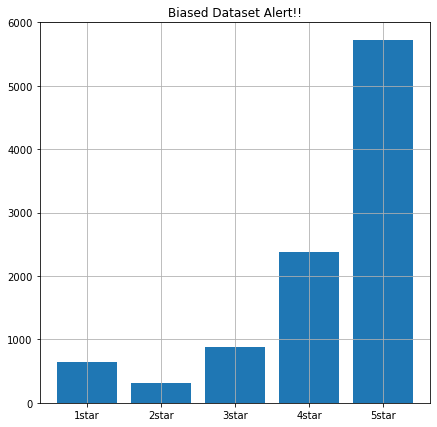

In [3]:
## plotting bar graph for 
plt.figure(figsize = (7,7))
ratings = ['1star','2star','3star', '4star', '5star']
numRatings = [len(dataFrame[dataFrame['rating'] == 1 ]),
             len(dataFrame[dataFrame['rating'] == 2 ]),
             len(dataFrame[dataFrame['rating'] == 3 ]),
             len(dataFrame[dataFrame['rating'] == 4 ]),
             len(dataFrame[dataFrame['rating'] == 5 ])
             ]
plt.title('Biased Dataset Alert!!')
plt.grid(True)
plt.bar(ratings, numRatings)
plt.show()

In [4]:
# to tackle first task lets define a useFul 
# Function
def WordCloudForRating (dataFrame, rating):
    df =  (dataFrame[dataFrame['rating'] == rating]['review'])
    corpus = ''
    
    for mem in df:
        corpus += mem
    
    corpus = re.sub('READ MORE', '', corpus)
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey',
                          stopwords = stopwords,  min_font_size = 10).generate(corpus)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud:  ' + str(rating) + ' star reviews')
    plt.tight_layout(pad = 0) 
  
    plt.show() 
    

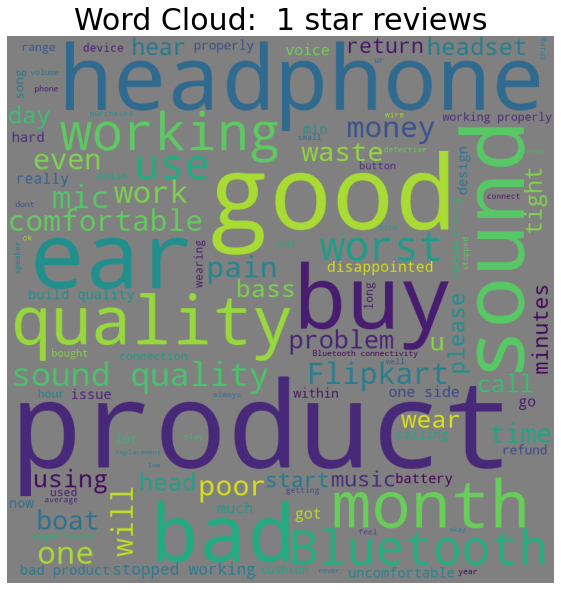

In [5]:
# word cloud for 1 star products
WordCloudForRating(dataFrame, 1)

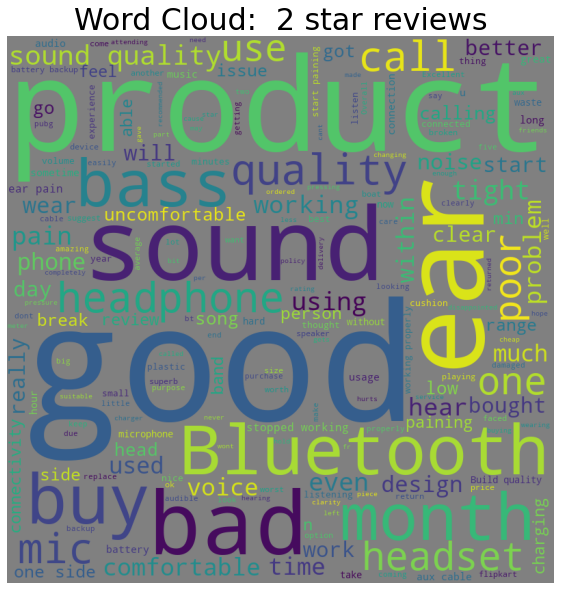

In [6]:
# word cloud for 2 star products
WordCloudForRating(dataFrame, 2)

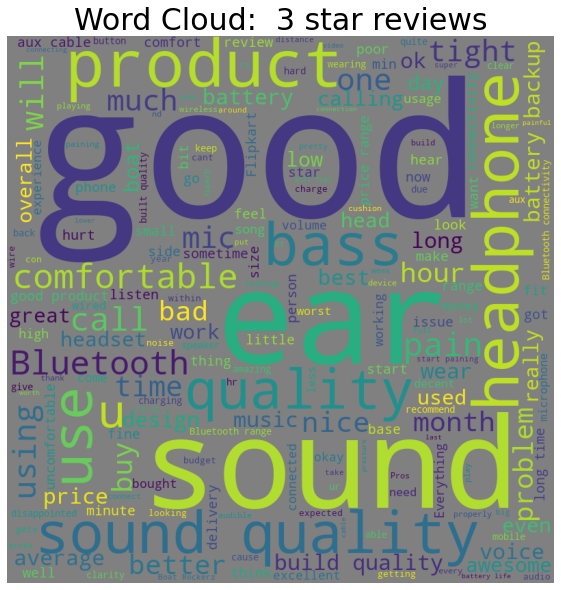

In [7]:
# word cloud for 3 star products
WordCloudForRating(dataFrame, 3)

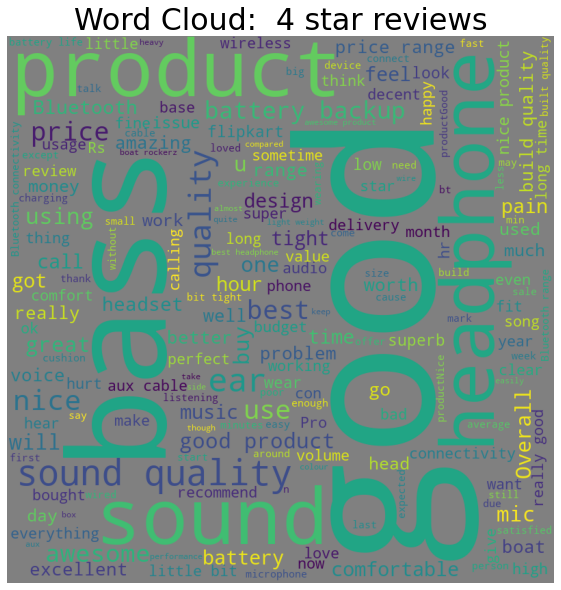

In [8]:
# word cloud for 4 star products
WordCloudForRating(dataFrame, 4)

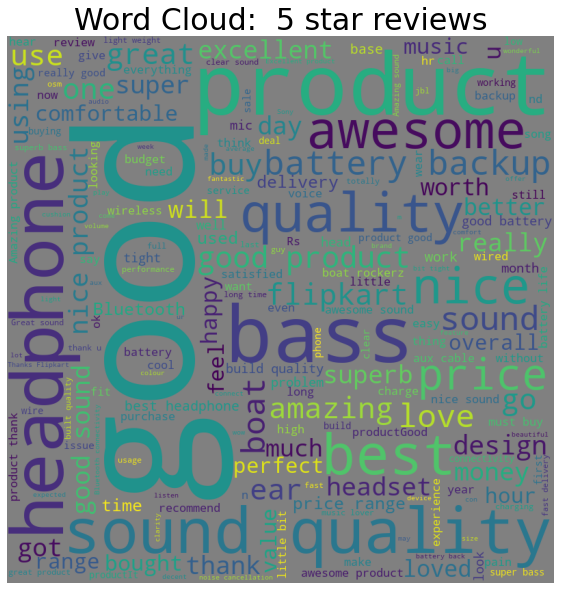

In [9]:
# word cloud for 5 star products
WordCloudForRating(dataFrame, 5)

In [10]:
## lets predict Product ratings 
## will be using mutliclass classification for 
## for our Purposue

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

text = dataFrame['review']
label = dataFrame['rating']

## Converting data to numpy array
## for ease of analysis

text = np.array(text)
label = np.array(label)
## also labels are from 1-5
## tf expects 0-4
## hence this
label = label - 1

## splitting to train and test sets
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size = 0.1, random_state = 42)

tokenizer = Tokenizer(num_words = 25000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen = 50)
X_test = pad_sequences(X_test, maxlen = 50)
len(tokenizer.word_index)


7856

In [11]:
## defining model 
Mymodel = tf.keras.models.Sequential([
    
    tf.keras.layers.Input(shape = (50,)),
    tf.keras.layers.Embedding(7857, 20),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(70, return_sequences = True)),
    tf.keras.layers.LSTM(140),
    tf.keras.layers.Dense(5, activation = 'softmax')
])

Mymodel.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [12]:
## training model 
retVal = Mymodel.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 20 )

Epoch 1/20
280/280 [==============================] - 5s 17ms/step - loss: 1.0529 - accuracy: 0.5877 - val_loss: 0.9151 - val_accuracy: 0.6278
Epoch 2/20
280/280 [==============================] - 4s 13ms/step - loss: 0.8919 - accuracy: 0.6320 - val_loss: 0.8920 - val_accuracy: 0.6368
Epoch 3/20
280/280 [==============================] - 3s 12ms/step - loss: 0.8096 - accuracy: 0.6747 - val_loss: 0.9075 - val_accuracy: 0.6197
Epoch 4/20
280/280 [==============================] - 4s 13ms/step - loss: 0.7342 - accuracy: 0.7069 - val_loss: 0.9529 - val_accuracy: 0.6328
Epoch 5/20
280/280 [==============================] - 4s 13ms/step - loss: 0.6746 - accuracy: 0.7341 - val_loss: 1.0100 - val_accuracy: 0.6167
Epoch 6/20
280/280 [==============================] - 4s 13ms/step - loss: 0.6310 - accuracy: 0.7564 - val_loss: 1.0157 - val_accuracy: 0.6318
Epoch 7/20
280/280 [==============================] - 4s 13ms/step - loss: 0.5893 - accuracy: 0.7761 - val_loss: 1.0393 - val_accuracy: 0.6318

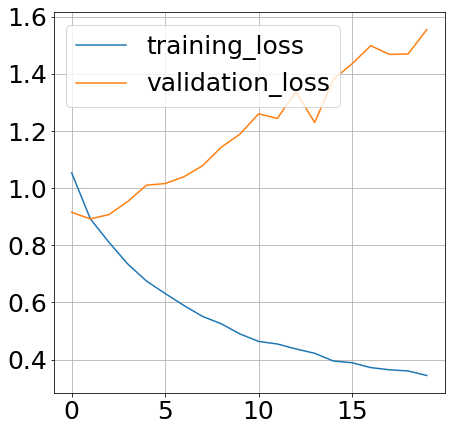

In [13]:
plt.figure(figsize = (7,7))
plt.plot(retVal.history['loss'], label = 'training_loss')
plt.plot(retVal.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

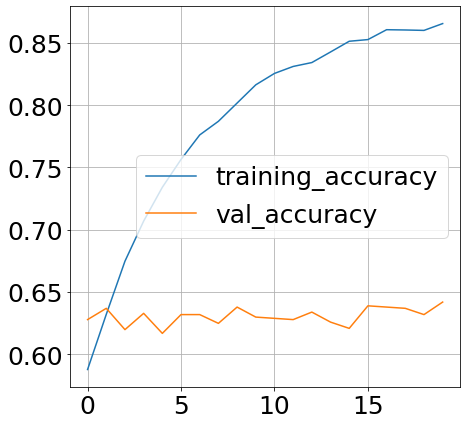

In [14]:
plt.figure(figsize = (7,7))
plt.plot(retVal.history['accuracy'], label = 'training_accuracy')
plt.plot(retVal.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.grid(True)